In [ ]:
# –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏
!pip install --upgrade pandas==1.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11.7 MB 5.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
import numpy as np
import pandas as pd
from typing import Callable, Tuple

from sklearn.model_selection import train_test_split

%pylab inline
plt.style.use('bmh')

Populating the interactive namespace from numpy and matplotlib


# 1. –°–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ
* –°–≥–µ–Ω–µ—Ä–∏—Ä—É–π—Ç–µ —Ä–∞–∑–ª–∏—á–Ω—ã–µ –ª–∏–Ω–µ–π–Ω—ã–µ, –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–µ –∏ –¥—Ä—É–≥–∏–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç–ª–∏—á–Ω—ã–µ –æ—Ç —Ç–µ—Ö, —á—Ç–æ –≤ –ø—Ä–∏–º–µ—Ä–µ(–∫–∞–∫ –º–∏–Ω–∏–º—É–º 3 –ø–æ–¥–Ω–∞–±–æ—Ä–∞).
* –ü—Ä–æ–≤–µ—Ä—å—Ç–µ –∫–∞–∫ —Å —ç—Ç–∏–º–∏ –Ω–∞–±–æ—Ä–∞–º–∏ —Å–ø—Ä–∞–≤—è—Ç—Å—è –ø–æ–ª–∏–Ω–æ–º—ã —Ä–∞–∑–ª–∏—á–Ω–æ–π —Å—Ç–µ–ø–µ–Ω–∏ –∏ —Ä–∞–∑–Ω—ã–µ —Ç–∏–ø—ã —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ (–¥–ª—è –∫–∞–∂–¥–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –ø—Ä–æ–≤–µ—Ä—å—Ç–µ –∫–∞–∫ –º–∏–Ω–∏–º—É–º –ø–æ 2 –º–æ–¥–µ–ª–∏).


## 1.1 –ó–∞–≥–æ–ª–æ–≤–æ–∫, —Å–∫—Ä—ã–≤–∞—é—â–∏–π —Ñ—É–Ω–∫—Ü–∏–∏ –∏–∑ –æ–∑–Ω–∞–∫–æ–º–∏—Ç–µ–ª—å–Ω–æ–≥–æ –±–ª–æ–∫–Ω–æ—Ç–∞

In [ ]:
def vis_data(x_train, x_test, y_train, y_test, gen_func, title, ax, alpha=1.):
  plt.rcParams.update({"font.size": 15})
  start_x = min(min(x_train), min(x_test))
  stop_x = max(max(x_train), max(x_test))
  true_x = np.linspace(start_x, stop_x, num=500)
  ax.scatter(x_train, y_train, label="–¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ", alpha=alpha)
  ax.scatter(x_test, y_test, label="–¢–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ", alpha=alpha)
  ax.plot(true_x, [gen_func(x) for x in true_x], label="–ü–æ—Ä–æ–∂–¥–∞—é—â–∞—è —Ñ—É–Ω–∫—Ü–∏—è", alpha=alpha)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.legend(loc="best")
  ax.set_title(title)
  return ax

class LinearRegression():
    def __init__(self,
                 learning_rate = 0.5,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)
        self.val_cost= np.zeros(epochs) #add validation

        self.n_batches = n_batches

        if not(self.weights is None) and (self.bias):
          if self.weights.size == X.shape[1]:
            self.weights = np.append(self.bias, self.weights)

    #---------------------------------
    def forward(self, X):
        return np.dot(X, self.weights)

    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size

    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size

    #---------------------------------
    def update(self):
        return self.weights - self.lr*self.grad

    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)

    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat.squeeze()

    #---------------------------------
    def score(self, X, y):
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))

    #---------------------------------
    def fit(self, X, y, X_test, y_test):
        # Add validation for early stop

        if self.weights is None:
            self.weights = self.init(X.shape[1])

        if self.bias is None:
            self.bias    = self.init(1)

        if self.weights.size == X.shape[1]:
            self.weights = np.append(self.bias,self.weights)

        self.best_weights = self.weights[:] # track best weights
        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:
            self.batch_size = y.size

        if self.n_batches is None:
            self.n_batches = y.size//self.batch_size

        best_score = 100.
        for i in range(self.epochs):
            loss = 0
            for cnt,(x_batch, y_batch) in enumerate(self.load_batch(X,y)):

                yhat         = self.forward(x_batch)
                self.grad    = self.grad_step(yhat,  y_batch, x_batch)
                self.weights = self.update()
                loss += self.loss(yhat,  y_batch)
                if cnt>= self.n_batches:
                    break

            self.cost[i] = loss / self.n_batches

            # val batches
            val_loss = 0
            for cnt,(x_batch, y_batch) in enumerate(self.load_batch(X_test, y_test)):
                yhat = self.forward(x_batch)
                val_loss += self.loss(yhat,  y_batch)
                if cnt >= self.n_batches:
                    break

            self.val_cost[i] = val_loss / (cnt + 1)
            if best_score > self.val_cost[i]:
              self.best_weights = self.weights[:]

        # restore best weights
        self.weights = self.best_weights[:]
        self.bias = self.weights[0]
    #---------------------------------
    def load_batch(self,X,y):
        idxs = np.arange(y.size)
        np.random.shuffle(idxs)

        for i_batch in range(0,y.size,self.batch_size):
            idx_batch = idxs[i_batch:i_batch+self.batch_size]
            x_batch   = np.take(X, idx_batch,axis=0)
            x_batch   = self.add_bias(x_batch)
            y_batch   = np.take(y, idx_batch)
            yield  x_batch, y_batch

    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

class ElasticRegression(LinearRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l1_penalty = 0.0,
                 l2_penalty = 0.0,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         n_batches    = n_batches,
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty

    #---------------------------------
    def loss(self,yhat, y):
        l1_term = self.l1_penalty*np.sum(np.abs(self.weights[1:]))
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        return np.square(yhat - y).mean() + l1_term + l2_term

    #---------------------------------
    def update(self):
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad +  np.sign(self.weights)*self.l1_penalty + l2_term)

## 1.2. –°–≤–æ–∏ –Ω–∞–±–æ—Ä—ã –¥–∞–Ω–Ω—ã—Ö

In [ ]:
class DataGenerator1D:
  def __init__(
      self, true_func: Callable[[None], float], balanced: bool=False, borders: Tuple[int, int]=(-5, 5)
    ) -> None:
    """Class init
    :param true_func: function for data generation
    :param num: number of observations
    :param balanced: if True data was uniformal distribution between borders
    :param borders: tuple with borders for all dims
    """
    self.gen_func = true_func
    self.borders = borders
    self.balanced = balanced

  def generate_dataset(self, num: int=250, noise_amplitude=1.):
    """Generate dataset
    :param num: number of samples
    :noise_amplitude: float, that mean absolute of amplitude of [multiplicative] noise
    """
    if self.balanced:
      idx = np.linspace(self.borders[0], self.borders[1], num=num)
    else:
      idx = np.random.choice(
          [x for x in np.linspace(self.borders[0], self.borders[1], num=num * 5)], num, replace=False
      )
    data = np.array([self.gen_func(x) for x in idx])
    data += np.random.randn(len(data)) * noise_amplitude
    X_train, X_test, y_train, y_test = train_test_split(idx, data, test_size=0.2)
    return X_train, X_test, y_train, y_test

class DataGeneratorND(DataGenerator1D):
  def __init__(self, true_func: Callable[[None], float], balanced: bool=False, borders: Tuple[int, int]=(-5, 5)):
    super().__init__(true_func, balanced, borders)

  def generate_dataset(self, ndims=2, num: int=250, noise_amplitude=1.):
    """Generate dataset
    :param: number of dims of X
    :param num: number of samples
    :noise_amplitude: float, that mean absolute of amplitude of [multiplicative] noise
    """
    if self.balanced:
      idx = []
      for dim in range(ndims):
        idx.append(np.linspace(self.borders[0], self.borders[1], num=num))
    else:
      for dim in range(ndims):
        idx.append(np.random.choice(
            [x for x in np.linspace(self.borders[0], self.borders[1], num=num * 5)], num, replace=False
        ))
    data = np.array([self.gen_func(x) for x in idx])
    data += np.random.randn(len(data)) * noise_amplitude
    X_train, X_test, y_train, y_test = train_test_split(idx, data, test_size=0.2)
    return X_train, X_test, y_train, y_test

In [ ]:
# 1. –∫—É—Å–æ—á–Ω–æ-–ª–∏–Ω–µ–π–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è
def relu(x):
  if x > 0:
    return (x)
  else:
    return (x) * 0.25

# 2. –ù–æ—Ä–º–ª—å–Ω—ã–π –∫–æ–ª–æ–∫–æ–ª
def normal_curve(x):
  return 1 / np.sqrt(np.pi * 2.) * np.exp(-.5 * x ** 2)

# 3. –≠–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–π —Å–ø–∞–¥
def negative_exp(x):
  return np.exp(-0.25 * (x * 10)) * np.sin(x * 10) / (x * 10)

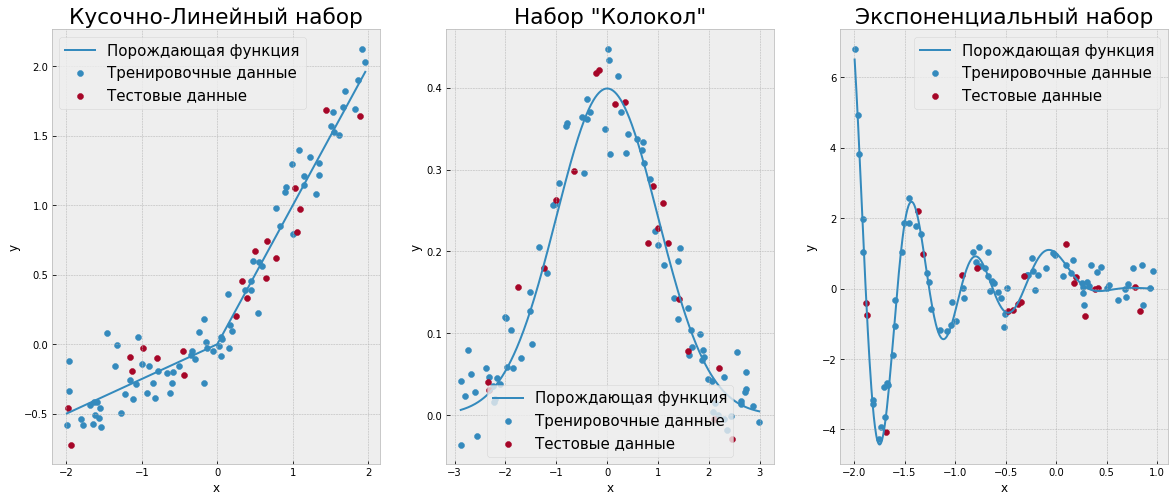

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
a = DataGenerator1D(relu, balanced=False, borders=(-2, 2))
X_train, X_test, y_train, y_test = a.generate_dataset(100, noise_amplitude=.15)
vis_data(X_train, X_test, y_train, y_test, relu, "–ö—É—Å–æ—á–Ω–æ-–õ–∏–Ω–µ–π–Ω—ã–π –Ω–∞–±–æ—Ä", ax=ax[0])
a = DataGenerator1D(normal_curve, balanced=False, borders=(-3, 3))
X_train, X_test, y_train, y_test = a.generate_dataset(100, noise_amplitude=.035)
vis_data(X_train, X_test, y_train, y_test, normal_curve, "–ù–∞–±–æ—Ä \"–ö–æ–ª–æ–∫–æ–ª\"", ax=ax[1])
a = DataGenerator1D(negative_exp, balanced=False, borders=(-2, 1))
X_train, X_test, y_train, y_test = a.generate_dataset(100, noise_amplitude=.35)
vis_data(X_train, X_test, y_train, y_test, negative_exp, "–≠–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–π –Ω–∞–±–æ—Ä", ax=ax[2])
plt.show()

–ù–∞–±–æ—Ä—ã –¥–∞–Ω–Ω—ã—Ö —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω—ã –Ω–µ—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ - —Å—É—â–µ—Å—Ç–≤—É–µ—Ç —Å–∫–æ–ø–ª–µ–Ω–∏—è —Ç–æ—á–µ–∫ –∏ –æ–±–ª–∞—Å—Ç–∏, –≥–¥–µ —Ç–æ—á–µ–∫ –º–∞–ª–æ. –¢–∞–∫ –∂–µ –±–æ–ª—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ–Ω–µ–µ –ø–æ–¥–≤–µ—Ä–∂–µ–Ω—ã —à—É–º—É —á–µ–º –º–∞–ª–µ–Ω—å–∫–∏–µ (–æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏). –ù–∞–±–æ—Ä—ã –¥–∞–Ω–Ω—ã—Ö:
* –ö—É—Å–æ—á–Ω–æ-–ª–∏–Ω–µ–π–Ω—ã–π - —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ –¥–≤—É—Ö –ª–∏–Ω–µ–Ω—ã—Ö –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ —É–≥–ª–∞–º–∏ –Ω–∞–∫–ª–æ–Ω–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç.
* –ù–∞–±–æ—Ä "–ö–æ–ª–æ–∫–æ–ª" - –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –Ω–µ–ª–∏–Ω–µ–π–Ω—É—é, –Ω–µ–ø–µ—Ä–µ–æ–¥–∏—á–µ—Å–∫—É—é —Ñ—É–Ω–∫—Ü–∏—é.
* –≠–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –∑–∞—Ç—É—Ö–∞—é—â–π —Å–∏–Ω—É—Å - —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ –ø–µ—Ä–µ–æ–¥–∏—á–µ—Å–∫–æ–π –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã –∏ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ –∑–∞—Ç—É—Ö–∞–Ω–∏—è.

## 1.3 –ö–∞–∫ —Å–ø—Ä–∞–≤–∏—Ç—Å—è —Å –¥–∞–Ω–Ω—ã–º–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏—è
1. –ö—É—Å–æ—á–Ω–æ-–ª–∏–Ω–µ–π–Ω—ã–π –Ω–∞–±–æ—Ä
2. –ù–∞–±–æ—Ä "–ö–æ–ª–æ–∫–æ–ª"
2. –≠–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –∑–∞—Ç—É—Ö–∞—é—â–π —Å–∏–Ω—É—Å

–í –¥–∞–Ω–Ω–æ–º —Ä–∞–∑–¥–µ–ª–µ —è —Ä–µ—à–∏–ª –∞–≤—Ç–æ–º–∞—Ç–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ø–æ–∏—Å–∫ –ª—É—á—à–µ–≥–æ —Ä–µ—à–µ–Ω–∏—è (–∏–∑–æ–±—Ä–µ—Å—Ç–∏ –≤–µ–ª–æ—Å–∏–ø–µ–¥ - grid search). –í –Ω–µ–º –∂–µ –±—É–¥—É—Ç —É—á—Ç–µ–Ω—ã –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–ø–æ–ª–∏–Ω–æ–º–∏–Ω–∞–ª—å–Ω—ã–µ).

In [ ]:
# –≤—ã–≤–æ–¥ –ø—Ä–æ–≥—Ä–µ—Å–±–∞—Ä–∞
from tqdm.notebook import tqdm
# —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫
import pandas as pd
# –∫–æ–º–±–∏–Ω–∞—Ç–æ—Ä–∏–∫–∞
import itertools
# –≤ –±–∞–∑–æ–≤–æ–º –∫–ª–∞—Å—Å–µ –Ω–µ—Ç –ø—Ä–æ–≤–µ—Ä–∫–∏ –Ω–∞ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç—å –ø—Ä–∏ —É–º–Ω–æ–∂–µ–Ω–∏–∏
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
class GridSearch:
  def __init__(self, search_params, train_x, test_x, train_y, test_y):
    self.train_x = train_x
    self.test_x = test_x
    self.train_y = train_y
    self.test_y = test_y
    self.parameters_table = pd.DataFrame(columns="learning_rate,epochs,batch_size,polynom_order,l1_penalty,l2_penalty,best_val_score,best_train_score,best_iter".split(","))
    self.history_dump = []
    self.weights_dump = []
    self.best_classifier = None
    self.best_order = None

    _keys, _values = zip(*search_params.items())
    self.grid_points = [dict(zip(_keys, v)) for v in itertools.product(*_values)]
    print(f"Have {len(self.grid_points)} points in hyperparameters space to search")

  def fit(self):
    for params in tqdm(self.grid_points):
      polynom_order = params.pop('polynom_order')
      self._one_round(params, polynom_order)

  def _one_round(self, regression_params, polynom_order):
    # palce params to frame
    self.parameters_table = self.parameters_table.append(regression_params, ignore_index=True)
    self.parameters_table.iloc[-1]["polynom_order"] = polynom_order
    # apply polynominal
    if polynom_order:
      train = self._to_polynom(self.train_x[:, 0], polynom_order)
      test = self._to_polynom(self.test_x[:, 0], polynom_order)
      for dim in range(1, self.train_x.shape[1]):
        train = np.hstack([train, self._to_polynom(self.train_x[:, dim], polynom_order)])
        test = np.hstack([test, self._to_polynom(self.test_x[:, 0], polynom_order)])
    else:
      train = self.train_x.copy()
      test = self.train_x.copy()
    # construct solver
    temp_reg = ElasticRegression(**regression_params)
    temp_reg.fit(train, self.train_y, test, self.test_y)
    self.history_dump.append((temp_reg.cost, temp_reg.val_cost))
    self.weights_dump.append(temp_reg.weights)
    # save best classifier
    best_val_score = min(temp_reg.val_cost)
    if self.best_classifier is None:
      self.best_classifier = temp_reg
      self.best_order = polynom_order
    if self.parameters_table["best_val_score"].min() > best_val_score:
      self.best_classifier = temp_reg
      self.best_order = polynom_order
    # compute best iter and score
    self.parameters_table.iloc[-1]["best_train_score"] = min(temp_reg.cost)
    self.parameters_table.iloc[-1]["best_val_score"] = best_val_score
    self.parameters_table.iloc[-1]["best_iter"] = np.argmin(np.array(temp_reg.val_cost))

  def _to_polynom(self, x, order=1, add_bias=False):
    order_range = range( 0 if add_bias else 1, order + 1 ,1)
    x = np.atleast_1d(x)[:]
    out = np.array([])
    for i in order_range:
        out = np.append(out, np.power(x,i))
    return out.reshape(-1, x.size).T

  def predict(self, X):
    if self.best_order:
      x = self._to_polynom(X[:, 0], self.best_order)
      for dim in range(1, X.shape[1]):
        x = np.hstack([x, self._to_polynom(X[:, dim], self.best_order)])
    else:
      x = X.copy()
    return self.best_classifier.predict(x)

–î–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∫–ª–∞—Å—Å–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∑–∞–¥–∞—Ç—å –æ–±–ª–∞—Å—Ç—å –ø–æ–∏—Å–∫–∞ —á–µ—Ä–µ–∑ —Å–ª–æ–≤–∞—Ä—å —Å–æ —Å–ø–∏—Å–∫–∞–º–∏:

```python
search_grid = {
    "learning_rate": [0.001],
    "epochs": [300],
    "batch_size": [10],
    "l1_penalty": [0.0001],
    "l2_penalty": [0.001],
    "polynom_order": [3]
}
```
–í —Å–ª–æ–≤–∞—Ä–µ –≤—ã—à–µ –ø—Ä–∏–≤–µ–¥–µ–Ω –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π –ø—Ä–∏–º–µ—Ä. –ï—Å–ª–∏ –ø–æ–ª–∏–Ω–æ–º—ã –Ω–µ –Ω—É–∂–Ω—ã, —Ç–æ `polynom_order` –≤—ã—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è –≤ None.

–ü–æ–∏—â–µ–º —Ä–µ—à–µ–Ω–∏–µ –¥–ª—è —Ç—Ä–µ—Ö –æ–¥–Ω–æ–º–µ—Ä–Ω—ã—Ö –¥–∞—Ç–∞—Å–µ—Ç–æ–≤.




###1. –ö—É—Å–æ—á–Ω–æ-–ª–∏–Ω–µ–π–Ω—ã–π

–ü—Ä–∏ –µ–≥–æ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ —É–∫–∞–∑–∞–ª `balanced=False`, –ø—Ä–∏ —ç—Ç–æ–º –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –±—É–¥–µ—Ç –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å —Ç–æ—á–∫–∏ –Ω–µ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –≤—Å–µ–≥–æ –æ—Ç—Ä–µ–∑–∫–∞ (–±—É–¥—É—Ç –ø–æ—è–≤–ª—è—Ç—Å—è —Å–∫–æ–ø–ª–µ–Ω–∏—è —Ç–æ—á–µ–∫).

In [ ]:
dataset = DataGenerator1D(relu, balanced=False, borders=(-2, 2))
X_train, X_test, y_train, y_test = dataset.generate_dataset(100, noise_amplitude=.15)

In [ ]:
search_grid = {
    "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.],
    "epochs": [1500], # –ú–æ–∂–µ–º —Å—Ç–∞–≤–∏—Ç—å –º–∞–∫—Å–∏–º—É–º, –ø–µ—Ä–µ–±–µ—Ä–∞—Ç—å —Å–º—ã—Å–ª–∞ –Ω–µ—Ç - —Ç—Ä–µ–∫ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –≤–Ω—É—Ç—Ä–∏ –ø–æ–∏—Å–∫–æ–≤–∏–∫–∞, –ø–æ –Ω–µ–º—É –º–æ–∂–Ω–æ –æ—Ç—Å–ª–µ–¥–∏—Ç—å
    "batch_size": [50], # –ù–µ –ø–µ—Ä–µ–±–∏—Ä–∞–ª, —Ç.–∫. —Å–∏–ª—å–Ω–æ –∑–∞–º–µ–¥–ª—è—é—Ç
    "l1_penalty": [0.0001, 0.001, 0.01, 0.1],
    "l2_penalty": [0.0001, 0.001, 0.01, 0.1],
    "polynom_order": [None, 0, 1, 2, 3, 4]
}
g_search = GridSearch(search_grid, X_train.reshape((-1, 1)), X_test.reshape((-1, 1)), y_train.reshape((-1, 1)), y_test.reshape((-1, 1)))

Have 480 points in hyperparameters space to search


In [ ]:
g_search.fit()
print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:")
g_search.parameters_table[g_search.parameters_table["best_val_score"] == g_search.parameters_table["best_val_score"].min()].iloc[:1]

  0%|          | 0/480 [00:00<?, ?it/s]

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:


learning_rate  epochs  batch_size  polynom_order  l1_penalty  l2_penalty  \
291            0.1  1500.0        50.0            2.0      0.0001      0.0001   

     best_val_score  best_train_score  best_iter  
291        0.018778            0.0627     1421.0

In [ ]:
def grid_vis(grid):
  best = grid.parameters_table["best_val_score"].sort_values(ascending=True).index[0]
  fig, ax = plt.subplots(1, figsize=(20, 8))
  ax.plot(grid.history_dump[best][0], label="Train score")
  ax.plot(grid.history_dump[best][1], label="Val score")
  ax.axvline(np.argmin(np.array(grid.history_dump[best][0])), color="black", label="Best iter")
  ax.set_xlabel("Epoch")
  ax.set_ylabel("Score (log scale)")
  ax.set_title("Grid search results")
  ax.set_yscale("log")
  ax.legend(loc="best")
  plt.show()
  return

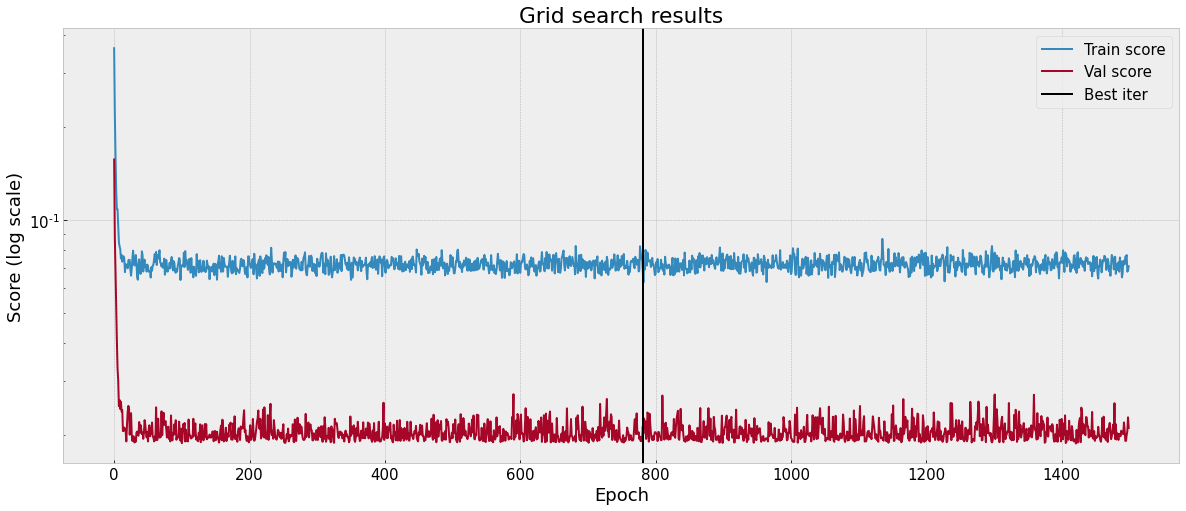

In [ ]:
grid_vis(g_search)

–í–æ—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º —Ä–µ–≥—Ä–µ—Å—Å–∏—é

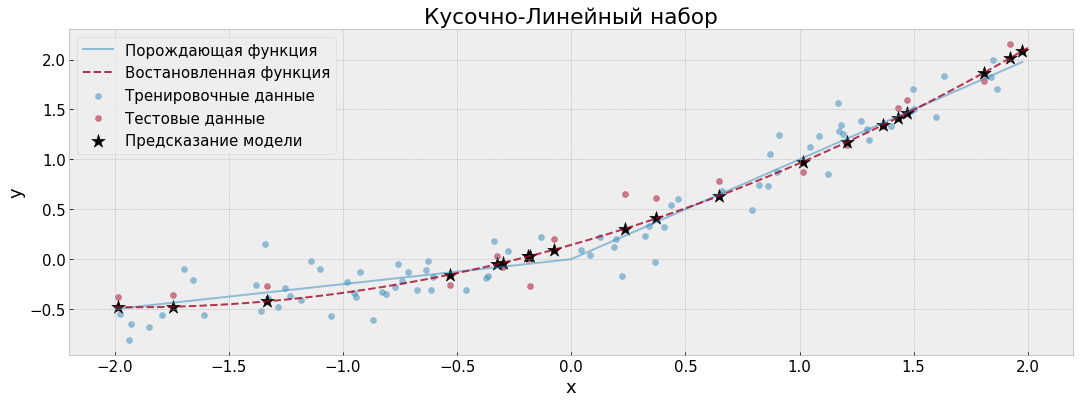

In [ ]:
fig, ax = plt.subplots(1, figsize=(18, 6))
vis_data(X_train, X_test, y_train, y_test, relu, "–ö—É—Å–æ—á–Ω–æ-–õ–∏–Ω–µ–π–Ω—ã–π –Ω–∞–±–æ—Ä", ax=ax, alpha=0.5)
model_predicts_test = g_search.predict(X_test.reshape((-1, 1)))
ax.scatter(X_test, model_predicts_test, s=200, marker="*", color="black", label="–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏")
new_x = np.linspace(-2, 2, num=100)
model_predicts_func = g_search.predict(new_x.reshape((-1, 1)))
ax.plot(new_x, model_predicts_func, linestyle="--", label="–í–æ—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è", alpha=.8)
ax.legend(loc="best")
plt.show()

–í–∏–¥–Ω–æ, —á—Ç–æ –Ω–∞ –∫–æ–Ω—Ü–∞—Ö –æ—Ç—Ä–µ–∑–∫–∞ –Ω–∞—á–∏–Ω–∞—é—Ç—Å—è –∏—Å–∫—Ä–µ–≤–ª–µ–Ω–∏—è, –æ–¥–Ω–∞–∫–æ –Ω–∞ —Å—Ä–µ–¥–Ω–µ–π —á–∞—Å—Ç–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏—è –≤–µ–¥–µ—Ç —Å–µ–±—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω–æ.

###2. –ö–æ–ª–æ–∫–æ–ª.

–ü—Ä–∏ –µ–≥–æ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ —É–∫–∞–∑–∞–ª `balanced=False`, –ø—Ä–∏ —ç—Ç–æ–º –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –±—É–¥–µ—Ç –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å —Ç–æ—á–∫–∏ –Ω–µ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –≤—Å–µ–≥–æ –æ—Ç—Ä–µ–∑–∫–∞ (–±—É–¥—É—Ç –ø–æ—è–≤–ª—è—Ç—Å—è —Å–∫–æ–ø–ª–µ–Ω–∏—è —Ç–æ—á–µ–∫).

Have 800 points in hyperparameters space to search


  0%|          | 0/800 [00:00<?, ?it/s]

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
     learning_rate  epochs  batch_size  polynom_order  l1_penalty  l2_penalty  \
165          0.001  1500.0        50.0            4.0      0.0001      0.0001   

     best_val_score  best_train_score  best_iter  
165        0.002609           0.00421     1499.0  


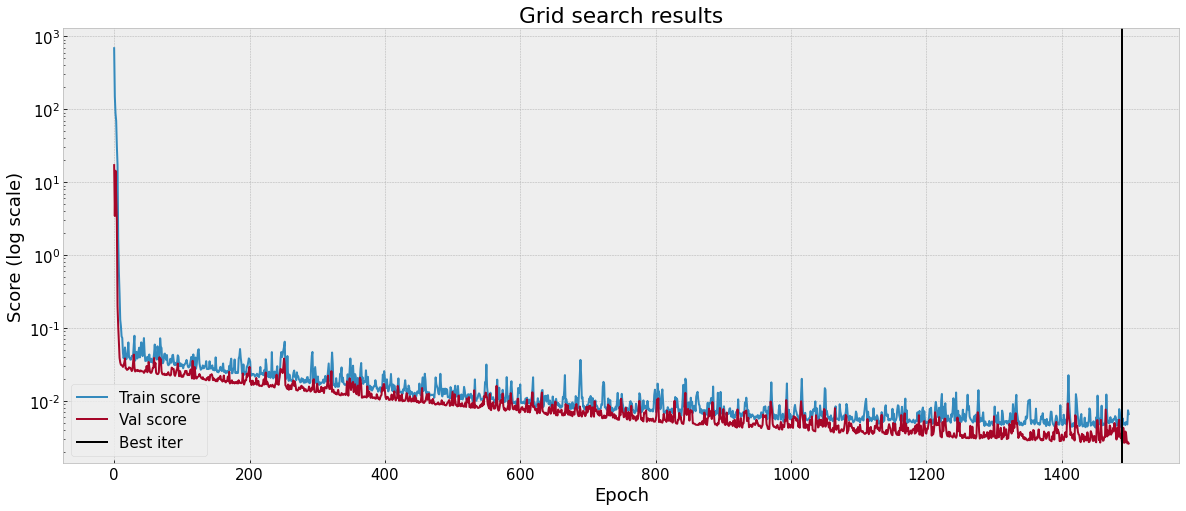

In [ ]:
dataset_normal = DataGenerator1D(normal_curve, balanced=False, borders=(-3, 3))
X_train, X_test, y_train, y_test = dataset_normal.generate_dataset(100, noise_amplitude=.035)
search_grid = {
    "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.],
    "epochs": [1500], # –ú–æ–∂–µ–º —Å—Ç–∞–≤–∏—Ç—å –º–∞–∫—Å–∏–º—É–º, –ø–µ—Ä–µ–±–µ—Ä–∞—Ç—å —Å–º—ã—Å–ª–∞ –Ω–µ—Ç - —Ç—Ä–µ–∫ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –≤–Ω—É—Ç—Ä–∏ –ø–æ–∏—Å–∫–æ–≤–∏–∫–∞, –ø–æ –Ω–µ–º—É –º–æ–∂–Ω–æ –æ—Ç—Å–ª–µ–¥–∏—Ç—å
    "batch_size": [50], # –ù–µ –ø–µ—Ä–µ–±–∏—Ä–∞–ª, —Ç.–∫. —Å–∏–ª—å–Ω–æ –∑–∞–º–µ–¥–ª—è—é—Ç
    "l1_penalty": [0.0001, 0.001, 0.01, 0.1],
    "l2_penalty": [0.0001, 0.001, 0.01, 0.1],
    "polynom_order": [None, 0, 1, 2, 3, 4, 5, 6, 10, 20]
}
g_search = GridSearch(search_grid, X_train.reshape((-1, 1)), X_test.reshape((-1, 1)), y_train.reshape((-1, 1)), y_test.reshape((-1, 1)))
g_search.fit()
print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:")
print(g_search.parameters_table[g_search.parameters_table["best_val_score"] == g_search.parameters_table["best_val_score"].min()].iloc[:1])
grid_vis(g_search)

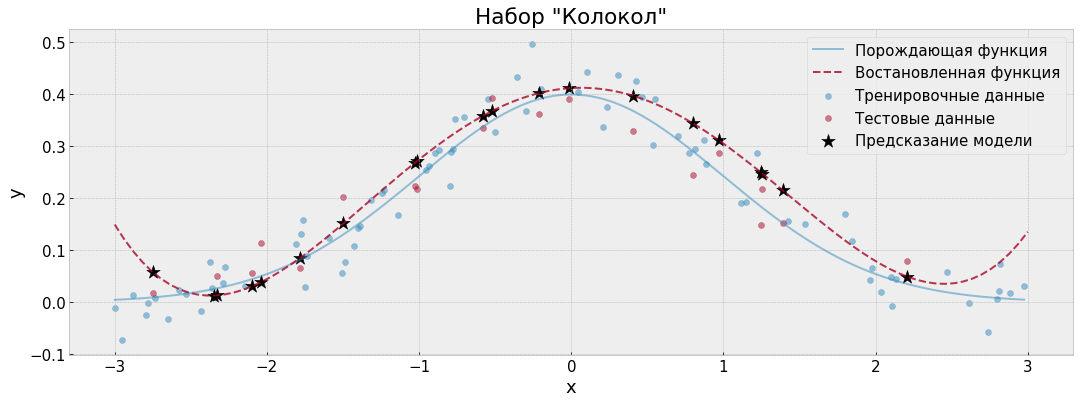

In [ ]:
fig, ax = plt.subplots(1, figsize=(18, 6))
vis_data(X_train, X_test, y_train, y_test, normal_curve, "–ù–∞–±–æ—Ä \"–ö–æ–ª–æ–∫–æ–ª\"", ax=ax, alpha=0.5)
model_predicts_test = g_search.predict(X_test.reshape((-1, 1)))
ax.scatter(X_test, model_predicts_test, s=200, marker="*", color="black", label="–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏")
new_x = np.linspace(-3, 3, num=100)
model_predicts_func = g_search.predict(new_x.reshape((-1, 1)))
ax.plot(new_x, model_predicts_func, linestyle="--", label="–í–æ—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è", alpha=.8)
ax.legend(loc="best")
plt.show()

–ù–∞–π–¥–µ–Ω–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è —Ö–æ—Ä–æ—à–æ –æ–ø–∏—Å—ã–≤–∞–µ—Ç –∏—Å—Ç–∏–Ω–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø–æ –¥–∞–Ω–Ω—ã–º, –æ–¥–Ω–∞–∫–æ –∏–º–µ–µ—Ç —Å–∏–ª—å–Ω–æ–µ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è –Ω–∞ –≥—Ä–∞–Ω–∏—Ü–∞—Ö (–≤ –æ–±–ª–∞—Å—Ç–∏ $-3$ –∏ $3$). –ú–æ–¥–µ–ª—å –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏ —Ç–æ–≥–æ, —á—Ç–æ —Ñ–∏—á–∞ –Ω–µ –≤—ã–π–¥–µ—Ç –∑–∞ –¥–∏–∞–ø–æ–∑–æ–Ω $[-3, 3]$.


###3. –≠–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–π

–ü—Ä–∏ –µ–≥–æ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ —É–∫–∞–∑–∞–ª `balanced=False`, –ø—Ä–∏ —ç—Ç–æ–º –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –±—É–¥–µ—Ç –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å —Ç–æ—á–∫–∏ –Ω–µ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –≤—Å–µ–≥–æ –æ—Ç—Ä–µ–∑–∫–∞ (–±—É–¥—É—Ç –ø–æ—è–≤–ª—è—Ç—Å—è —Å–∫–æ–ø–ª–µ–Ω–∏—è —Ç–æ—á–µ–∫).

Have 800 points in hyperparameters space to search


  0%|          | 0/800 [00:00<?, ?it/s]

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
     learning_rate  epochs  batch_size  polynom_order  l1_penalty  l2_penalty  \
167          0.001  1500.0        50.0            6.0      0.0001      0.0001   

     best_val_score  best_train_score  best_iter  
167        1.714209          3.801479       43.0  


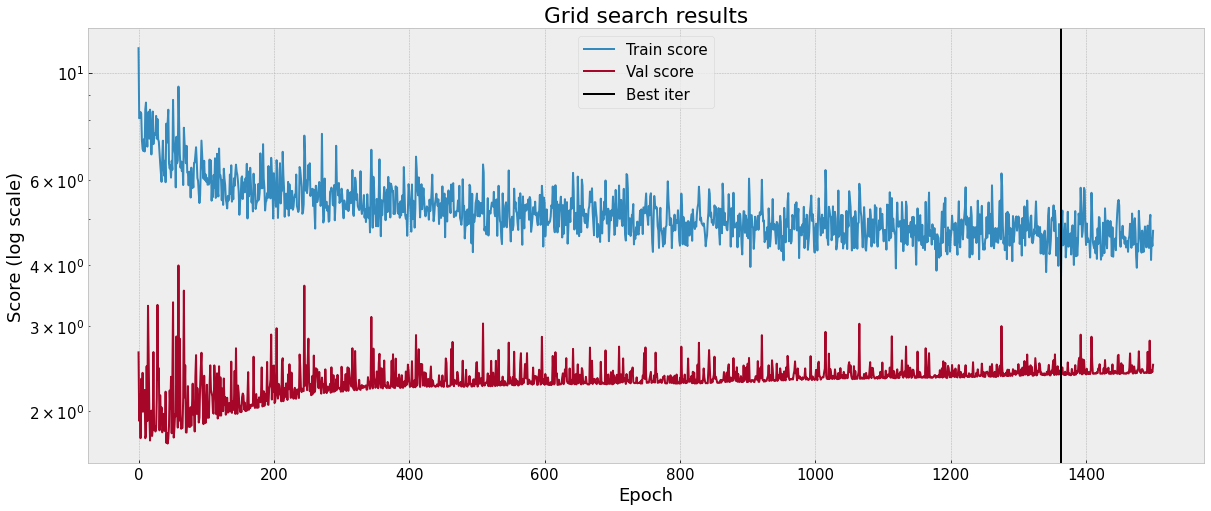

In [ ]:
dataset_exp = DataGenerator1D(negative_exp, balanced=False, borders=(-2, 1))
X_train, X_test, y_train, y_test = dataset_exp.generate_dataset(100, noise_amplitude=.35)
search_grid = {
    "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.],
    "epochs": [1500], # –ú–æ–∂–µ–º —Å—Ç–∞–≤–∏—Ç—å –º–∞–∫—Å–∏–º—É–º, –ø–µ—Ä–µ–±–µ—Ä–∞—Ç—å —Å–º—ã—Å–ª–∞ –Ω–µ—Ç - —Ç—Ä–µ–∫ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –≤–Ω—É—Ç—Ä–∏ –ø–æ–∏—Å–∫–æ–≤–∏–∫–∞, –ø–æ –Ω–µ–º—É –º–æ–∂–Ω–æ –æ—Ç—Å–ª–µ–¥–∏—Ç—å
    "batch_size": [50], # –ù–µ –ø–µ—Ä–µ–±–∏—Ä–∞–ª, —Ç.–∫. —Å–∏–ª—å–Ω–æ –∑–∞–º–µ–¥–ª—è—é—Ç
    "l1_penalty": [0.0001, 0.001, 0.01, 0.1],
    "l2_penalty": [0.0001, 0.001, 0.01, 0.1],
    "polynom_order": [None, 0, 1, 2, 3, 4, 5, 6, 10, 20]
}
g_search = GridSearch(search_grid, X_train.reshape((-1, 1)), X_test.reshape((-1, 1)), y_train.reshape((-1, 1)), y_test.reshape((-1, 1)))
g_search.fit()
print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:")
print(g_search.parameters_table[g_search.parameters_table["best_val_score"] == g_search.parameters_table["best_val_score"].min()].iloc[:1])
grid_vis(g_search)

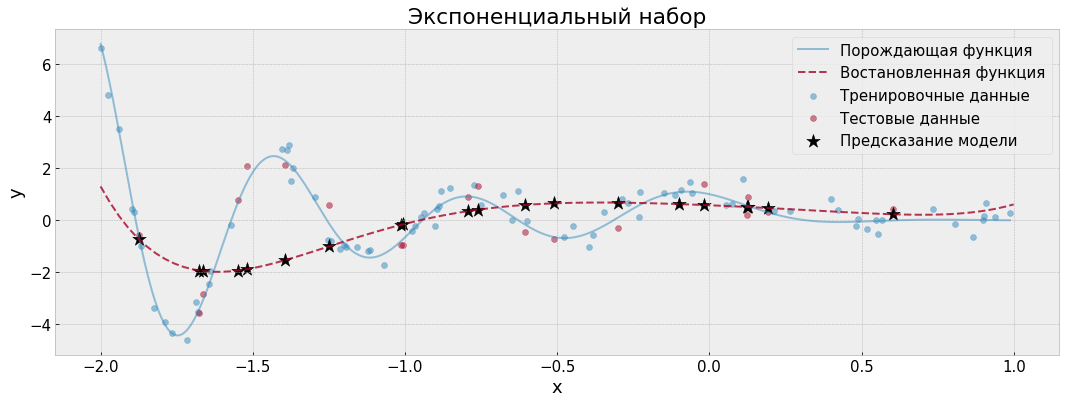

In [ ]:
fig, ax = plt.subplots(1, figsize=(18, 6))
vis_data(X_train, X_test, y_train, y_test, negative_exp, "–≠–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–π –Ω–∞–±–æ—Ä", ax=ax, alpha=0.5)
model_predicts_test = g_search.predict(X_test.reshape((-1, 1)))
ax.scatter(X_test, model_predicts_test, s=200, marker="*", color="black", label="–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏")
new_x = np.linspace(-2, 1, num=100)
model_predicts_func = g_search.predict(new_x.reshape((-1, 1)))
ax.plot(new_x, model_predicts_func, linestyle="--", label="–í–æ—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è", alpha=.8)
ax.legend(loc="best")
plt.show()

–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –ø–æ–¥–æ–±—Ä–∞—Ç—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à—É—é –ª–∏–Ω–µ–π–Ω—É—é –º–æ–¥–µ–ª—å –ø–æ–¥ —Ç–∞–∫–æ–π —Ç–∏–ø –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö.

–ù–µ–º–Ω–æ–≥–æ —á–∏—Ç–æ–≤, –≤–Ω–µ—Å–µ–º –ø–µ—Ä–µ–æ–¥–∏—á–µ—Å–∫–∏–µ —Ç–µ—Ä–º—ã –≤ –¥–∞–Ω–Ω—ã–µ

$$x^{new}=\begin{bmatrix}
    x_{1} & sin(x_{1}) & cos(x_{1}) \\
    x_{2} & sin(x_{2}) & cos(x_{2}) \\
    \dots & \dots & \dots \\
    x_{d} & sin(x_{d}) & cos(x_{d})
\end{bmatrix}$$

In [ ]:
periodic = lambda x: np.hstack((x, np.sin(x), np.cos(x)))

class GridSearchPeriodic(GridSearch):
  def __init__(self, search_params, train_x, test_x, train_y, test_y):
    super().__init__(search_params, train_x, test_x, train_y, test_y)

  def _to_polynom(self, x, order=1, add_bias=False):
    order_range = range( 0 if add_bias else 1, order + 1 ,1)
    x = np.atleast_1d(x)[:]
    out = np.array([])
    for i in order_range:
        out = np.append(out, np.power(x,i))
    out = out.reshape(-1, x.size).T
    out_pereodic = periodic(out[:, 0].reshape((-1, 1)))
    for dim in range(1, out.shape[1]):
      out_pereodic = np.hstack([out_pereodic, periodic(out[:, dim].reshape((-1, 1)))])
    return out_pereodic

Have 800 points in hyperparameters space to search


  0%|          | 0/800 [00:00<?, ?it/s]

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
     learning_rate  epochs  batch_size  polynom_order  l1_penalty  l2_penalty  \
325           0.01  1500.0        50.0            4.0      0.0001      0.0001   

     best_val_score  best_train_score  best_iter  
325        0.423344          0.952453     1299.0  


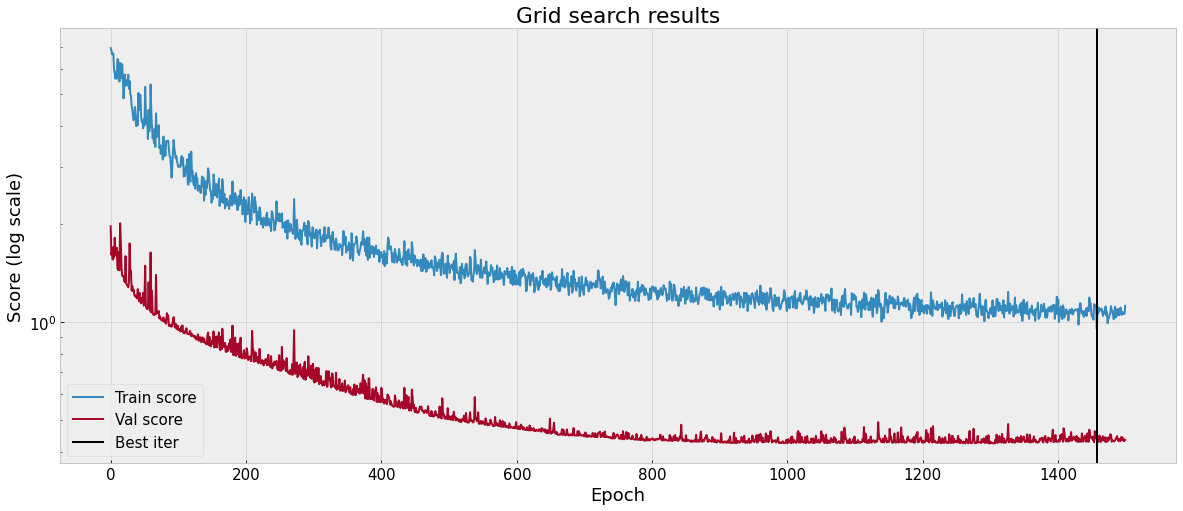

In [ ]:
g_search = GridSearchPeriodic(search_grid, X_train.reshape((-1, 1)), X_test.reshape((-1, 1)), y_train.reshape((-1, 1)), y_test.reshape((-1, 1)))
g_search.fit()
print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:")
print(g_search.parameters_table[g_search.parameters_table["best_val_score"] == g_search.parameters_table["best_val_score"].min()].iloc[:1])
grid_vis(g_search)

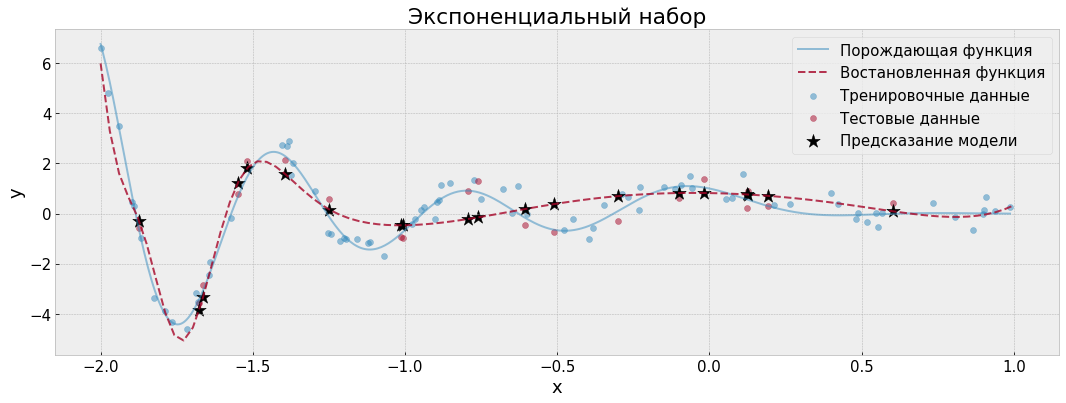

In [ ]:
fig, ax = plt.subplots(1, figsize=(18, 6))
vis_data(X_train, X_test, y_train, y_test, negative_exp, "–≠–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–π –Ω–∞–±–æ—Ä", ax=ax, alpha=0.5)
model_predicts_test = g_search.predict(X_test.reshape((-1, 1)))
ax.scatter(X_test, model_predicts_test, s=200, marker="*", color="black", label="–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏")
new_x = np.linspace(-2, 1, num=100)
model_predicts_func = g_search.predict(new_x.reshape((-1, 1)))
ax.plot(new_x, model_predicts_func, linestyle="--", label="–í–æ—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è", alpha=.8)
ax.legend(loc="best")
plt.show()

–í–Ω–µ—Å–µ–Ω–∏–µ –ø–µ—Ä–µ–æ–¥–∏—á–µ—Å–∫–∏—Ö —Ç–µ—Ä–º–æ–≤ —Å–∏–ª—å–Ω–æ —É–ª—É—á—à–∏–ª–æ –º–æ–¥–µ–ª—å, –æ–¥–Ω–∞–∫–æ –æ—Å—Ç–∞–µ—Ç—Å—è –≤–æ–ø—Ä–æ—Å - –ø—Ä–∏–º–µ–Ω–∏–º –ª–∏ —Ç–∞–∫–æ–π –ø–æ–¥—Ö–æ–¥ –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ? –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –æ–Ω –±—É–¥–µ—Ç –Ω–µ–ø–ª–æ—Ö –ø—Ä–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–∏ –Ω–∞ –¥–∞–Ω–Ω—ã—Ö, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–∏—Å—É—Ç—Å–≤—É–± —Å–µ–∑–æ–Ω–Ω—ã–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è.

# 2. –î–ª—è –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö Cars Moldova

* C–∫–∞—á–∞–π—Ç–µ –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö Cars Moldova (—Å—Ä–∞–∑—É –æ—á–∏—â–µ–Ω–Ω—ã—Ö –æ—Ç –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –∏ –≤—ã–±—Ä–æ—Å–æ–≤, –ª—É—á—à–µ —Å –¥–æ–±–∞–≤–ª–µ–Ω–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∏–∑ ¬´–ó–∞–¥–∞–Ω–∏—è 1¬ª).
* –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ª—é–±—É—é –∏–∑ –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω–Ω—ã—Ö –≤–∞–º–∏ –º–æ–¥–µ–ª–µ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ü–µ–Ω—ã –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –Ω–∞ –≤—Ç–æ—Ä–∏—á–Ω–æ–º —Ä—ã–Ω–∫–µ –ú–æ–ª–¥–∞–≤–∏–∏. –û—Ü–µ–Ω–∏—Ç–µ –º–æ–¥–µ–ª—å –Ω–∞ –æ—Ç–ª–æ–∂–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.
* –û—Ü–µ–Ω–∏—Ç–µ –≤–ª–∏—è–Ω–∏–µ —Ä–∞–∑–Ω—ã—Ö —Ç–∏–ø–æ–≤ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç (–∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏–∏, –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –∏–ª–∏ —Å—Ç–µ–ø–µ–Ω–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤).
* –°—Ä–∞–≤–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –º–æ–¥–µ–ª–∏ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –ø—Ä–∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é one-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è.
–û—Ü–µ–Ω–∏—Ç–µ –Ω–∞–∏–±–æ–ª–µ–µ –∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –º–æ–¥–µ–ª–∏ –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–≤ –≤–µ—Å–∞.

–ü–ª–∞–Ω:
1. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
2. –ü–æ–∏—Å–∫ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –Ω–∞–±–æ—Ä–∞
3. –ê–Ω–∞–ª–∏–∑ –º–µ—Ç—Ä–∏–∫



###1. –ó–∞–≥—Ä—É–∑–∫–∞ –î–∞–Ω–Ω—ã—Ö

–†–∞–∑–æ–±—ä–µ–º –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ `train`, `validation` –∏ `test` –¥–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã –Ω–µ –¥–æ–ø—É—Å—Ç–∏—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –Ω–∞ `train` (–æ—Ü–µ–Ω–∫–∞ –ø–æ `validation`) –∏ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∏—Ç–æ–≥–æ–≤—É—é –º–æ–¥–µ–ª—å –Ω–∞ –æ—Ç–ª–æ–∂–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (`test`).

In [ ]:
import pandas as pd
import pickle
import os

In [ ]:
pd_url = lambda url: 'https://drive.google.com/uc?id=' + url.split('/')[-2]

In [ ]:
url_std_onehot = 'https://drive.google.com/file/d/1flC3-E5p6KpV8p_PyhiwxasU5tZZ-8L7/view?usp=share_link'
url_power_onehot = 'https://drive.google.com/file/d/183PQt28qLymtjVllNb-sRm_2zrbKatWV/view?usp=share_link'
url_norm_onehot = 'https://drive.google.com/file/d/1p9JrNYwprl0NQfkFTdwe7iRQaJl59NlJ/view?usp=share_link'

url_std_ordinal = 'https://drive.google.com/file/d/1rvJUxtZOgfuiY6e6GJA93Hg-lNT7UCVM/view?usp=share_link'
url_power_ordinal = 'https://drive.google.com/file/d/12a8Majne9vkOtPZxcKJPfa-rcprglA90/view?usp=share_link'
url_norm_ordinal = 'https://drive.google.com/file/d/1lYf2BWm9_15ZvCgeaOT5NU9xXHt6-czN/view?usp=share_link'

In [ ]:
data_std_onehot = pd.read_csv(pd_url(url_std_onehot))
data_power_onehot = pd.read_csv(pd_url(url_power_onehot))
data_norm_onehot = pd.read_csv(pd_url(url_norm_onehot))
data_std_ordinal = pd.read_csv(pd_url(url_std_ordinal))
data_power_ordinal = pd.read_csv(pd_url(url_power_ordinal))
data_norm_ordinal = pd.read_csv(pd_url(url_norm_ordinal))
print("–ó–∞–≥—Ä—É–∂–µ–Ω—ã –≤—Å–µ –Ω–∞–±–æ—Ä—ã –¥–∞–Ω–Ω—ã—Ö [–ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω—ã–µ]")

–ó–∞–≥—Ä—É–∂–µ–Ω—ã –≤—Å–µ –Ω–∞–±–æ—Ä—ã –¥–∞–Ω–Ω—ã—Ö [–ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω—ã–µ]


–ü–æ–º–µ—Å—Ç–∏–º –¥–∞—Ç–∞—Å–µ—Ç—ã –≤ —Å–ª–æ–≤–∞—Ä—å –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è

In [ ]:
data = {
  "data_std_onehot": data_std_onehot,
  "data_power_onehot": data_power_onehot,
  "data_norm_onehot": data_norm_onehot,
  "data_std_ordinal": data_std_ordinal,
  "data_power_ordinal": data_power_ordinal,
  "data_norm_ordinal": data_norm_ordinal
}

In [ ]:
# –ü—Ä–æ–≤–µ—Ä—è–µ–º, –µ—Å—Ç—å –ª–∏ –ø—Ä–æ—à–ª–∞—è —Ä–∞–∑–±–∏–≤–∫–∞
if "train_idx.pkl" in os.listdir():
  train_idx = pickle.load(open("./train_idx.pkl", "rb"))
  val_idx = pickle.load(open("./val_idx.pkl", "rb"))
  test_idx = pickle.load(open("./test_idx.pkl", "rb"))
  print(f"Restore data splits from disk\n\t{'Train':15s}: {len(train_idx)}\n\t{'Validation':15s}: {len(val_idx)}\n\t{'Test':15s}: {len(test_idx)}")
else:
  # –ü–æ–ª—É—á–µ–Ω–∏–µ –∏–Ω–¥–µ–∫—Å–æ–≤
  _all_idx = [x for x in range(len(data_std_onehot))]
  # 80% –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ
  train_idx = np.random.choice(_all_idx, int(len(_all_idx) * .8), replace=False).tolist()
  # 10% –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é
  val_idx = np.random.choice(list(set(_all_idx) - set(train_idx)), int((len(_all_idx) - len(train_idx)) * .5), replace=False).tolist()
  # 10% –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é
  test_idx = list(set(_all_idx) - set(train_idx) - set(val_idx))
  del _all_idx
  pickle.dump(train_idx, open("./train_idx.pkl", "wb"))
  pickle.dump(val_idx, open("./val_idx.pkl", "wb"))
  pickle.dump(test_idx, open("./test_idx.pkl", "wb"))
  print(f"Data splits\n\t{'Train':15s}: {len(train_idx)}\n\t{'Validation':15s}: {len(val_idx)}\n\t{'Test':15s}: {len(test_idx)}")

Restore data splits from disk
	Train          : 25776
	Validation     : 3222
	Test           : 3222


###2. –ü–æ–∏—Å–∫ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏

–î–ª—è —Ç—Ä–µ–∫–∞ –æ—Ç–∫–ª–∏–∫–æ–≤ –±—É–¥—É—Ç –∑–∞–ø–∏—Å—ã–≤–∞—Ç—å—Å—è –∏—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö (—á—Ç–æ–±—ã –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –ø–æ—Å—á–∏—Ç–∞—Ç—å –º–µ—Ç—Ä–∏–∫–∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π).

In [ ]:
# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã —Å–µ—Ç–∫–∏ –ø–æ–∏—Å–∫–∞
search_grid = {
    "learning_rate": [0.01, 0.1],
    "epochs": [1500], # –ú–æ–∂–µ–º —Å—Ç–∞–≤–∏—Ç—å –º–∞–∫—Å–∏–º—É–º, –ø–µ—Ä–µ–±–µ—Ä–∞—Ç—å —Å–º—ã—Å–ª–∞ –Ω–µ—Ç - —Ç—Ä–µ–∫ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –≤–Ω—É—Ç—Ä–∏ –ø–æ–∏—Å–∫–æ–≤–∏–∫–∞, –ø–æ –Ω–µ–º—É –º–æ–∂–Ω–æ –æ—Ç—Å–ª–µ–¥–∏—Ç—å
    "batch_size": [3222], # –ù–µ –ø–µ—Ä–µ–±–∏—Ä–∞–ª, —Ç.–∫. —Å–∏–ª—å–Ω–æ –∑–∞–º–µ–¥–ª—è—é—Ç
    "l1_penalty": [0.001, 0.01, 0.1],
    "l2_penalty": [0.001, 0.01, 0.1],
    "polynom_order": [None, 1, 2] # –ø–æ–º–µ–Ω—å—à–µ –ø–æ–ª–∏–Ω–æ–º–æ–≤ - —ç–∫–æ–Ω–æ–º–∏–º :)
}

In [ ]:
# –ö–æ—Å—Ç—ã–ª—å –¥–ª—è –ø—Ä–æ–¥–æ–ª–∂–µ–Ω–∏—è (Colab –ª—é–±–∏—Ç –≤–Ω–µ–∑–∞–ø–Ω–æ —Å–µ—Å—Å–∏—é –∑–∞–∫–æ–Ω—á–∏—Ç—å)
START_FROM = 0

In [ ]:
models_predictions_frame = dict()
for idx, (k, v) in enumerate(data.items()):
  if idx < START_FROM:
    continue
  print("=" * 5 + f" {k} " + "=" * 5)
  # –ü–æ–ª—É—á–∞–µ–º –∫–æ–ª–æ–Ω–∫–∏
  target = "Price(euro)"
  features = [x for x in v.columns if x != target]

  # –ü–æ–ª—É—á–∞–µ–º –Ω–∞–±–æ—Ä—ã –¥–∞–Ω–Ω—ã—Ö
  X_train, y_train = v.iloc[train_idx][features].values, v.iloc[train_idx][target].values.reshape((-1, 1))
  X_val, y_val = v.iloc[val_idx][features].values, v.iloc[val_idx][target].values.reshape((-1, 1))
  X_test, y_test = v.iloc[test_idx][features].values, v.iloc[test_idx][target].values.reshape((-1, 1))

  # –§–∏—Ç–∏–º –ø–æ–∏—Å–∫
  g_search = GridSearch(search_grid, X_train, X_val, y_train, y_val)
  g_search.fit()

  # –î–∞–º–ø –æ—Ç–≤–µ—Ç–∞ –∏ –¥–∏–Ω–∞–º–∏–∫–∏ –æ–±—É—á–µ–Ω–∏—è
  model_predicts_train = g_search.predict(X_train)
  model_predicts_val = g_search.predict(X_val)
  model_predicts_test = g_search.predict(X_test)
  models_predictions_frame[k] = {
      "train": model_predicts_train,
      "val": model_predicts_val,
      "test": model_predicts_test,
      "parameters_table": g_search.parameters_table,
      "history": g_search.history_dump
  }
  # –î–∞–º–ø–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã (—á—Ç–æ –± –Ω–µ –ø–µ—Ä–µ—É—á–∏–≤–∞—Ç—å)
  pickle.dump(models_predictions_frame, open(f"experiment_data_{idx}.pkl", "wb"))

===== data_std_onehot =====
Have 54 points in hyperparameters space to search


  0%|          | 0/54 [00:00<?, ?it/s]

>–í –∏—Ç–æ–≥–µ –Ω–∞ —Å–≤–æ–µ–º –∫–æ–º–ø—å—é—Ç–µ—Ä–µ –ø–µ—Ä–µ—Å—á–∏—Ç–∞–ª –¥–ª—è 144 —Ç–æ—á–µ–∫ –∫–∞–∂–¥—É—é - —Å–ª–∏—à–∫–æ–º —á–∞—Å—Ç–æ colab –æ—Ç–∫–ª—é—á–∞–ª—Å—è :)

 –°–µ—Ç–∫–∞:
 ```python
 search_grid = {
        "learning_rate": [0.001, 0.01, 0.1],
        "epochs": [1500],
        "train_batch_size": [25776],
        "eval_batch_size": [3222],
        "l1_penalty": [0.001, 0.01, 0.1, 0.5],
        "l2_penalty": [0.001, 0.01, 0.1, 0.5],
        "polynom_order": [None, 1, 2]
    }
 ```

 >–õ–æ–∫–∞–ª—å–Ω—ã–µ —É–ª—É—á—à–µ–Ω–∏—è:
 * –ø—Ä–æ–±–æ–≤–∞–ª –Ω–∞ `torch` - —Å–∏–ª—å–Ω–æ –º–µ–¥–ª–µ–Ω–Ω–µ–µ, –≤–∏–¥–∏–º–æ bottleneck –≤ –ø–µ—Ä–µ–∫–∏–¥—ã–≤–∞–Ω–∏–∏ —Å `CPU` –Ω–∞ `GPU` - –Ω–æ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ –Ω–µ —Å—Ç—Ä–æ–∏–ª –ø—Ä–æ—Ñ–∏–ª–∏ –Ω–∞–≥—Ä—É–∑–∫–∏ ($-40 \% $ —Å–∫–æ—Ä–æ—Å—Ç–∏)
 * –≤–Ω–µ—Å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –≤ –∫–ª–∞—Å—Å —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: `train_batch`, `val_batch` - —Ç.–∫. –∫–æ–º–ø—å—é—Ç–µ—Ä –ø–æ–º–æ—â–Ω–µ–µ –∏ –≤ —Ç—Ä–µ–π–Ω –≤–ª–∞–∑–∏—Ç –≤–µ—Å—å –æ–±—É—á–∞—é—â–∏–π –Ω–∞–±–æ—Ä ($+1400\%$ —Å–∫–æ—Ä–æ—Å—Ç–∏: $7$ –º–∏–Ω—É—Ç –ø—Ä–æ—Ç–∏–≤ $30$ —Å–µ–∫—É–Ω–¥)
 * –ø—Ä–æ–±–æ–≤–∞–ª `numba njit` - –ø—Ä–∏—Ä–æ—Å—Ç–∞ –Ω–µ—Ç
 * –ø–µ—Ä–µ–¥–µ–ª–∞–Ω–∞ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –Ω–∞ –Ω—É–ª–∏ (–¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –Ω–µ –Ω–∞—à–µ–ª –æ–±—ä—è—Å–Ω–µ–Ω–∏—è [–ª—É—á—à–µ —ç—Ç–æ–≥–æ](https://datascience.stackexchange.com/questions/30989/what-are-the-cases-where-it-is-fine-to-initialize-all-weights-to-zero), –Ω–æ —Ä–µ—à–∏–ª, —á—Ç–æ —Ç—É—Ç "—Å–µ—Ç–µ–≤—ã–µ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏" [–•–∏, uniform, –∏ —Ç. –¥.] –Ω–µ –æ—á–µ–Ω—å –ø–æ–¥–æ–π–¥—É—Çüòä)

In [ ]:
from urllib.request import urlopen
import io

In [ ]:
get_pickle_from_disk = lambda url: pickle.load(io.BytesIO(urlopen(pd_url(url)).read()))

models_predictions_frame = dict()
models_predictions_frame["data_std_onehot"] = get_pickle_from_disk("https://drive.google.com/file/d/1NR8IRvBFNI54sG6pBqzi3svEnHmK5oiH/view?usp=share_link")["data_std_onehot"]   # experiment_data_0.pkl
models_predictions_frame["data_power_onehot"] = get_pickle_from_disk("https://drive.google.com/file/d/1da9PalRjztXJVWH-BRGn2pPoNjyud9_o/view?usp=share_link")["data_power_onehot"]  # experiment_data_1.pkl
models_predictions_frame["data_norm_onehot"] = get_pickle_from_disk("https://drive.google.com/file/d/1K3d3jpPIxh-OsSEsQSZMSz1hP5m4EDkV/view?usp=share_link")["data_norm_onehot"]   # experiment_data_2.pkl
models_predictions_frame["data_std_ordinal"] = get_pickle_from_disk("https://drive.google.com/file/d/1y1ERUKb9hKASJQsYEjk4qKDgNWCXf45t/view?usp=share_link")["data_std_ordinal"]   # experiment_data_3.pkl
models_predictions_frame["data_power_ordinal"] = get_pickle_from_disk("https://drive.google.com/file/d/1lqNcvh3l7GKKYDhA9T152RxE-hzQnH_5/view?usp=share_link")["data_power_ordinal"] # experiment_data_4.pkl
models_predictions_frame["data_norm_ordinal"] = get_pickle_from_disk("https://drive.google.com/file/d/1GMeGoqMol7mlQo6LyduhKfqh30Bm_gqP/view?usp=share_link")["data_norm_ordinal"]  # experiment_data_5.pkl

###3. –ê–Ω–∞–ª–∏–∑ –º–µ—Ç—Ä–∏–∫

> –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∏—Å—Ç–æ—Ä–∏–π –æ–±—É—á–µ–Ω–∏—è (–æ—à–∏–±–æ–∫ –Ω–∞ –∏—Ç–µ—Ä–∞—Ü–∏—è—Ö)

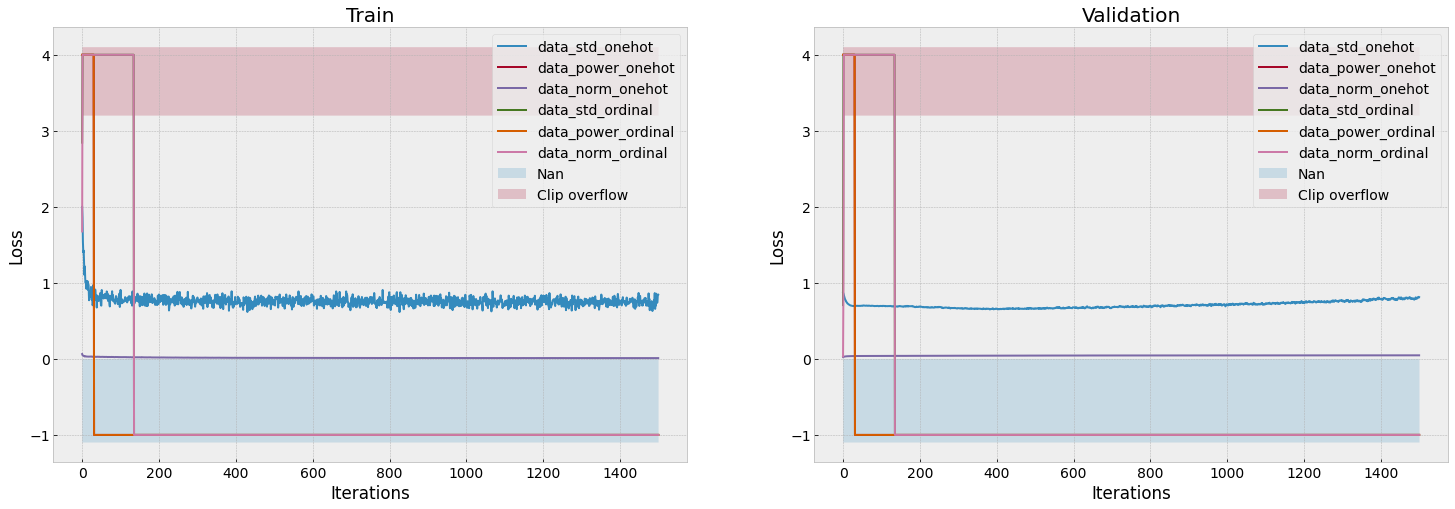

In [ ]:
plt.rcParams.update({"font.size":14})
fig, ax = plt.subplots(1, 2, figsize=(25, 8))
for k, v in models_predictions_frame.items():
    best = v["parameters_table"]["best_val_score"].sort_values(ascending=True).index[0]
    ax[0].plot(np.clip(np.nan_to_num(v["history"][best][0], nan=-1.), -1, 4), label=k)
    ax[1].plot(np.clip(np.nan_to_num(v["history"][best][1], nan=-1.), -1, 4), label=k)
xx = [x for x in range(1501)]
ys = [-1.1 for x in range(1501)]
y_max = [4.1 for x in range(1501)]
y_min = [3.2 for x in range(1501)]
for i in range(2):
    ax[i].set_xlabel("Iterations")
    ax[i].set_ylabel("Loss")
    ax[i].fill_between(xx, ys, interpolate=True, label="Nan", alpha=0.2)
    ax[i].fill_between(xx, y_min, y_max, alpha=0.2, label="Clip overflow")
    ax[i].legend(loc="best")
ax[0].set_title("Train")
ax[1].set_title("Validation")
plt.show()

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö –ø—Ä–∏—Å—É—Ç—Å–≤—É—é—Ç 2 –æ–±–ª–∞—Å—Ç–∏:
* –°–∏–Ω—è—è [Nan] - –≤ –Ω–µ–µ –æ—Ç–æ–±—Ä–∞–∂–∞—é—Ç—Å—è –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è `Nan`, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏
* –ö—Ä–∞—Å–Ω–∞—è [Clip overflow] - —Å—Ä–µ–∑–∞–Ω–∞ –æ—à–∏–±–∫–∞ –≤—ã—à–µ $4.0$

–î–∞–Ω–Ω—ã–µ –æ–±–ª–∞—Å—Ç–∏ –ø–æ—è–≤–∏–ª–∏—Å—å –∏–∑-–∑–∞ –Ω–µ—É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏ –æ–±—É–µ–Ω–∏—è –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –º–æ–¥–µ–ª–µ–π. –ù–∞–ø—Ä–∏–º–µ—Ä, –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å–ø–æ—Å–æ–±–æ–º `ordinal` –≤—Å–µ–≥–¥–∞ –ø–æ–ø–∞–¥–∞—é—Ç –≤ —ç–∏ –æ–±–ª–∞—Å—Ç–∏. –≠—Ñ—Ñ–µ–∫—Ç —Å–≤—è–∑–∞–Ω —Å–æ –≤–∑—Ä—ã–≤–æ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤, —É–º–µ–Ω—å—à–µ–Ω–∏–µ `learning rate` –∏ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è –Ω–µ —Å–∏–ª—å–Ω–æ —Ä–µ—à–∞–µ—Ç –ø—Ä–æ–±–ª–µ–º—É.

–õ—É—á—à–∞—è –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö: `data_norm_onehot` - –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏ onehot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö.

–ù–∏–∂–µ –ø—Ä–∏–≤–µ–¥–µ–Ω–∞ —Ç–∞–±–ª–∏—Ü–∞ —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –¥–ª—è **Elastic Regression**:

In [ ]:
models_predictions_frame["data_norm_onehot"]["parameters_table"].iloc[best: best + 1].drop(columns=["best_weights"])

learning_rate  epochs batch_size polynom_order l1_penalty l2_penalty  \
1         0.001  1500.0        NaN             1      0.001      0.001   

  best_val_score best_train_score best_iter  eval_batch_size  train_batch_size  
1       0.027923         0.027943      1499           3222.0           25776.0

–û—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏:
* –Ω–µ–æ–±—Ö–æ–¥–∏–º –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –Ω–µ–±–æ–ª—å—à–æ–π `learning rate` (–≤ —Å–µ—Ç–∫–µ - `[0.001, 0.01, 0.1]`) - –æ–±—É—á–ª–æ–≤–ª–µ–Ω —Ç–æ–Ω–∫–æ–π –Ω–∞—Å—Ç—Ä–æ–π–∫–æ–π –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é (—Å –±–æ–ª—å—à–∏–º `lr` –Ω–µ —Å—Ö–æ–¥–∏—Ç—Å—è).
* —Å—Ç–µ–ø–µ–Ω–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø–µ—Ä–≤–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞ - –≤—ã—Å—à–∏–µ –ø–æ—Ä—è–¥–∫–∏ —É—Ö—É–¥—à–∞—é—Ç –º–æ–¥–µ–ª—å.
* –Ω–∞–∏–º–µ–Ω—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è l1 –∏ l2 —à—Ç—Ä–∞—Ñ–æ–≤ (`0.001`, –≤ —Å–µ—Ç–∫–µ - `[0.001, 0.01, 0.1, 0.5]`) - –º–æ–¥–µ–ª—å –Ω–µ —Å–∏–ª—å–Ω–æ —à—Ç—Ä–∞—Ñ—É–µ—Ç—Å—è –∑–∞ –≤–µ—Å–∞, —É—Å—Ç–æ–π—á–∏–≤–æ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç –Ω–æ—Ä–º—É –≤–µ—Å–æ–≤.
* `score` –Ω–∞ –æ–±—É—á–µ–Ω–∏–∏ –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –Ω–µ —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è ($5$ –∑–Ω–∞–∫ –ø–æ—Å–ª–µ –∑–∞–ø—è—Ç–æ–π - –≤ —Ä–∞–π–æ–Ω–µ $1-3%$ –≤ –º–∞—Å—à—Ç–∞–±–µ –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö) - –æ—Ç–ª–∏—á–Ω—ã–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å.
* –ª—É—á—à–∞—è –∏—Ç–µ—Ä–∞—Ü–∏—è - –ø—Ä–µ–¥–ø–æ—Å–ª–µ–¥–Ω—è—è, —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –º–æ–Ω–æ—Ç–æ–Ω–Ω–æ—Å—Ç–∏ –æ–±—É—á–µ–Ω–∏—è (–º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å —É—á–∏—Ç—å –¥–æ–ª—å—à–µ)

>\* `train_batch_size` –∏ `eval_batch_size` –Ω–µ –ø–µ—Ä–µ–±–∏—Ä–≤–∞–ª–∏—Å—å, –ø–æ–≤–µ–∑–ª–æ, —á—Ç–æ –≤—Å–µ –≤–º–µ—Å—Ç–µ –ø–æ–º–µ—Å—Ç–∏–ª–æ—Å—å –≤ RAM (—É—á–∏—Ç—ã–≤–∞—è 4 –ø–æ—Ä—è–¥ —Å—Ç–µ–ø–µ–Ω–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è) - –¥–ª—è –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏—è RAM $\ge16$ Gb.

**–ü–æ—Å—Ç—Ä–æ–∏–º —á–∏—Å–ª–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–π** - $RMSE$, $MAE$, $R^{2}$

> –ë–µ—Ä—É —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

–ó–∞–≥—Ä—É–∑–∫–∞ —Ä–∞–∑–±–∏–µ–Ω–∏–π –Ω–∞ `train`, `val`, `test` –∫–æ—Ç–æ—Ä—ã–µ –¥–µ–ª–∞–ª —É —Å–µ–±—è –ª–æ–∫–∞–ª—å–Ω–æ –¥–ª—è –∫–æ–Ω—Å–∏—Å—Ç–µ–Ω—Ç–Ω–æ—Å—Ç–∏ –∞–Ω–∞–ª–∏–∑–∞.

In [ ]:
train_idx = pickle.load(open("./train_idx.pkl", "rb"))
val_idx = pickle.load(open("./val_idx.pkl", "rb"))
test_idx = pickle.load(open("./test_idx.pkl", "rb"))

In [ ]:
def get_metrics():
    results = {}
    for name in ["train", "val", "test"]:
        results[(name, "r2")] = []
        results[(name, "rmse")] = []
        results[(name, "mse")] = []
    results[("name", "")] = []

    for key in models_predictions_frame.keys():
        target = "Price(euro)"
        features = [x for x in data[key].columns if x != target]
        results[("name", "")].append(key)

        for name, idx in zip(["train", "val", "test"], [train_idx, val_idx, test_idx]):
            y = data[key].iloc[idx][target].values.reshape((-1, 1))
            y_hat = models_predictions_frame[key][name]

            results[(name, "r2")].append(r2_score(y, y_hat))
            results[(name, "rmse")].append(mean_squared_error(y, y_hat, squared=True))
            results[(name, "mse")].append(mean_squared_error(y, y_hat, squared=False))
    results = pd.DataFrame(results).set_index(("name", ""))
    return results

metrics = pd.DataFrame(get_metrics())
metrics

train                                      val  \
                              r2          rmse          mse            r2   
(name, )                                                                    
data_std_onehot     6.646365e-01  3.413735e-01     0.584272  6.828929e-01   
data_power_onehot  -4.872211e+01  1.686425e+02    12.986241 -5.158821e+01   
data_norm_onehot    8.985216e-01  2.850081e-03     0.053386  8.942912e-01   
data_std_ordinal   -1.311194e+02  1.344871e+02    11.596857 -1.535224e+02   
data_power_ordinal -4.872211e+01  1.686425e+02    12.986241 -5.158821e+01   
data_norm_ordinal  -3.571846e+08  1.003174e+07  3167.292530 -4.132565e+08   

                                                       test                \
                            rmse          mse            r2          rmse   
(name, )                                                                    
data_std_onehot     2.764179e-01     0.525755  6.431989e-01  3.505993e-01   
data_power_onehot   1.677523e+02    12.951923 -4.863716e+01  1.662536e+02   
data_norm_onehot    2.587966e-03     0.050872  9.037964e-01  2.628624e-03   
data_std_ordinal    1.346950e+02    11.605819 -1.379238e+02  1.365091e+02   
data_power_ordinal  1.677523e+02    12.951923 -4.863716e+01  1.662536e+02   
data_norm_ordinal   1.011736e+07  3180.779635 -3.760446e+08  1.027488e+07   

                                 
                            mse  
(name, )                         
data_std_onehot        0.592114  
data_power_onehot     12.893937  
data_norm_onehot       0.051270  
data_std_ordinal      11.683711  
data_power_ordinal    12.893937  
data_norm_ordinal   3205.445048

In [ ]:
# –û—Ç–¥–µ–ª—å–Ω–æ –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å
metrics.loc["data_norm_onehot"]

train  r2      0.898522
       rmse    0.002850
       mse     0.053386
val    r2      0.894291
       rmse    0.002588
       mse     0.050872
test   r2      0.903796
       rmse    0.002629
       mse     0.051270
Name: data_norm_onehot, dtype: float64

–ü–æ –º–µ—Ç—Ä–∏–∫–∞–º –º–æ–¥–µ–ª—å –æ—Ç–ª–∏—á–Ω–∞—è: $R^2$ –Ω–∞ —Ç–µ—Å—Ç–µ - $0.9$. –û–¥–Ω–∞–∫–æ –Ω–µ –≤—Å–µ —Ç–∞–∫ —Ä–∞–¥–æ—Å—Ç–Ω–æ, –¥–µ–ª–æ –≤ —Ç–æ–º, —á—Ç–æ –Ω–æ—Ä–º–∏—Ä–æ–≤–∫–∞ —Ü–µ–Ω—ã –ø—Ä–æ–≤–æ–¥–∏–ª–∞—Å—å –Ω–∞ –≤—Å–µ–º –¥–∏–∞–ø–æ–∑–æ–Ω–µ: –æ—Ç –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–π –¥–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π —Ü–µ–Ω—ã –ø–æ—á—Ç–∏ $100 000$ –µ–≤—Ä–æ! –ü—Ä–µ–¥—Å—Ç–∞–≤–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤ –≤–∏–¥–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã.

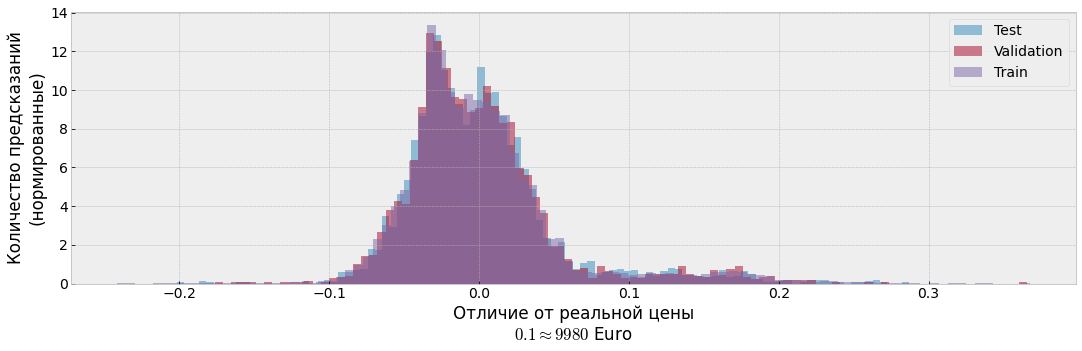

In [ ]:
plt.figure(figsize=(18, 5))
plt.hist(
    data["data_norm_onehot"].iloc[test_idx]["Price(euro)"].values - models_predictions_frame["data_norm_onehot"]["test"],
    bins=100, label="Test", alpha=0.5, density=True
)
plt.hist(
    data["data_norm_onehot"].iloc[val_idx]["Price(euro)"].values - models_predictions_frame["data_norm_onehot"]["val"],
    bins=100, label="Validation", alpha=0.5, density=True
)
plt.hist(
    data["data_norm_onehot"].iloc[train_idx]["Price(euro)"].values - models_predictions_frame["data_norm_onehot"]["train"],
    bins=100, label="Train", alpha=0.5, density=True
)
plt.xlabel("–û—Ç–ª–∏—á–∏–µ –æ—Ç —Ä–µ–∞–ª—å–Ω–æ–π —Ü–µ–Ω—ã\n" + r"$0.1 \approx 9980$ Euro")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π\n(–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ)")
plt.legend(loc="best")
plt.show()

–ö–∞–∫ –≤–∏–¥–Ω–æ –∏–∑ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –æ—Å–Ω–æ–≤–Ω–∞—è —á–∞—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å–∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω–∞ –≤ –¥–∏–∞–ø–æ–∑–æ–Ω–µ $[-0.7, 0.7]$ - —á—Ç–æ –ø—Ä–∏–º–µ—Ä–Ω–æ $\pm 7000$ –µ–≤—Ä–æ. –û–¥–Ω–∞–∫–æ, –º–æ–¥–µ–ª—å –æ—Ç–ª–∏—á–Ω–æ –æ–±—É—á–∏–ª–∞—Å—å —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è –ø–æ–≤–µ–¥–µ–Ω–∏—è –Ω–∞ `train`, `validation` –∏ `test` - –ø–æ—á—Ç–∏ –∏–¥–µ–Ω—Ç–∏—á–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

> –ü—Ä–∏–≤–µ–¥–µ–º `–ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è` –∏ `—Ä–µ–∞–ª—å–Ω—ã–µ —Ü–µ–Ω—ã` –∫ –∏—Å—Ö–æ–¥–Ω–æ–º—É –≤–∏–¥—É

In [ ]:
# –≤–µ—Å–∞ –¥–ª—è –æ–±—Ä–∞—Ç–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
scaler = pickle.load(open("./norm_scaler.pkl", "rb"))

In [ ]:
price_frame = pd.DataFrame(
    {
        "True price": (data["data_norm_onehot"].iloc[test_idx]["Price(euro)"] *  scaler[test_idx]).astype(int),
        "Predict price": (models_predictions_frame["data_norm_onehot"]["test"] * scaler[test_idx]).astype(int),
    }
)
print(f"{'r2':4s}: {r2_score(price_frame['True price'], price_frame['Predict price']):12.3f}")
print(f"{'rmse':4s}: {mean_squared_error(price_frame['True price'], price_frame['Predict price'], squared=True):12.3f}")
print(f"{'mse':4s}: {mean_squared_error(price_frame['True price'], price_frame['Predict price'], squared=False):12.3f}")
print(f"{'mean':4s}: {(price_frame['True price'] - price_frame['Predict price']).mean():12.3f}")
print(f"{'std':4s}: {(price_frame['True price'] - price_frame['Predict price']).std():12.3f}")

r2  :        0.452
rmse: 48830818.139
mse :     6987.905
mean:     -550.617
std :     6967.260


–° –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ–º —Ä–µ–∞–ª—å–Ω–æ–≥–æ –º–∞—Å—à—Ç–∞–±–∞ —Ü–µ–Ω - –≤—Å–µ –≤—Å—Ç–∞–µ—Ç –Ω–∞ —Å–≤–æ–∏ –º–µ—Å—Ç–∞: –≤ —Å—Ä–µ–¥–Ω–µ–º –æ—à–∏–±–∫–∞ $\pm 7000$ –µ–≤—Ä–æ!

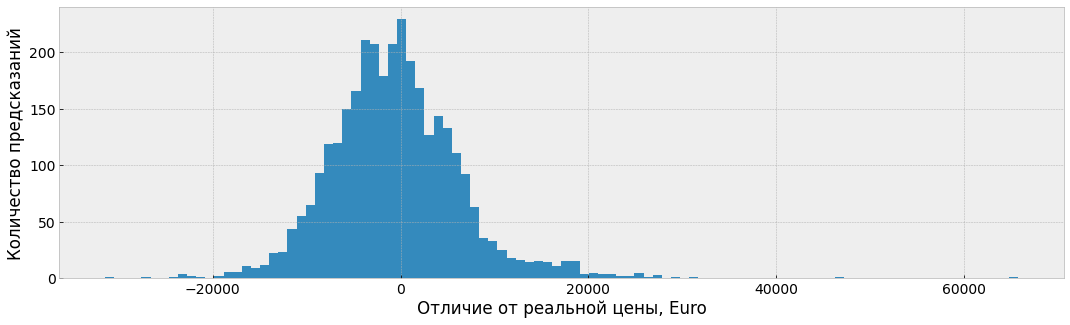

In [ ]:
plt.figure(figsize=(18, 5))
plt.hist(price_frame["True price"] - price_frame["Predict price"], bins=100)
plt.xlabel("–û—Ç–ª–∏—á–∏–µ –æ—Ç —Ä–µ–∞–ª—å–Ω–æ–π —Ü–µ–Ω—ã, Euro")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π")
plt.show()

–ù–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ **—Ä–∞–∑–Ω–æ—Å—Ç—å** —Ä–µ–∞–ª—å–Ω–æ–π –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–π —Ü–µ–Ω—ã.

**–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –≤–ª–∏—è–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ —Ñ–∏–Ω–∞–ª—å–Ω—É—é –æ—Ü–µ–Ω–∫—É —Ü–µ–Ω—ã**

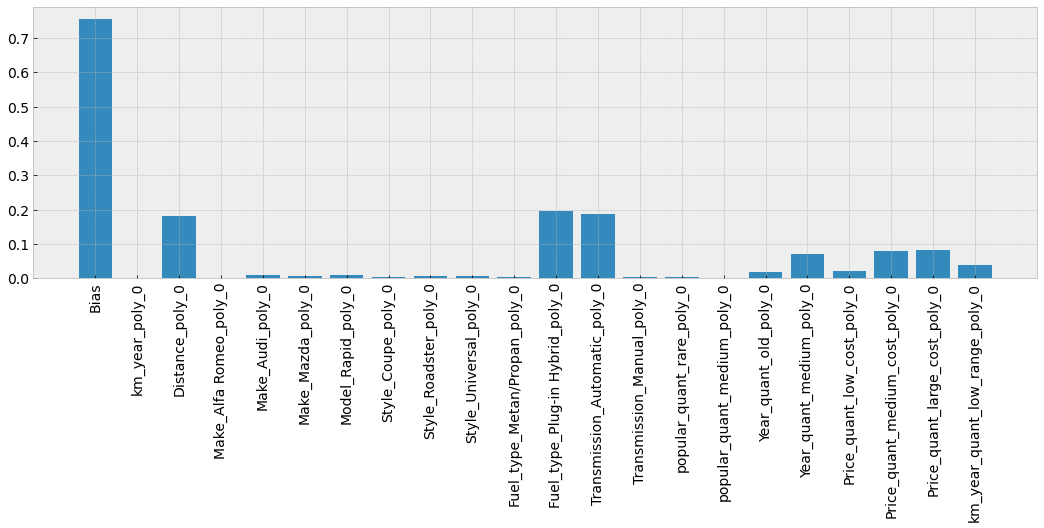

In [ ]:
def decode_weights(data: dict, train_results: dict, model_name: str, w_percentile: int=90) -> dict:

    # get best model results
    best_iter = train_results[model_name]["parameters_table"]["best_val_score"].sort_values(ascending=True).index[0]
    polynom_order = train_results[model_name]["parameters_table"]["polynom_order"].iloc[best]

    restore_weights = lambda w_str: np.array([
        float(x) for x in w_str.replace("\n", " ").replace("[", "").replace("]", "").split(" ") if "" != x
    ])

    best_w = restore_weights(models_predictions_frame[model_name]["parameters_table"]["best_weights"].iloc[best_iter])
    feature_idx = np.where(best_w > np.percentile(best_w, w_percentile))[0]

    # decode all feature names
    if polynom_order is None:
        columns_names = ["Bias"] + list(data[model_name].columns)
    else:
        columns_names = ["Bias"]
        for col in data[model_name].columns:
            for poly in range(polynom_order):
                columns_names += [f"{col}_poly_{poly}"]
    columns_names = np.array(columns_names)

    fig, ax = plt.subplots(1, figsize=(18, 5))
    ax.bar(columns_names[feature_idx.tolist()], best_w[feature_idx.tolist()])
    ax.tick_params(axis='x', labelrotation=90)
    plt.show()

    return

decode_weights(data, models_predictions_frame, "data_norm_onehot")

–í–µ—Å–∞ –≤ —Ü–µ–ª–æ–º –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–æ —Ç—Ä–∞–∫—Ç—É—é—Ç—Å—è (–≤–∑—è–ª $\ge90$ –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å):
* –û—Å–Ω–æ–≤–Ω–æ–π –≤–µ—Å - —Å–º–µ—â–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏, –ø–æ–∫–∞ –Ω–µ –ø—Ä–∏–¥—É–º–∞–ª –∫–∞–∫ –µ–≥–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å.
* –ò–∑ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –º–∞—à–∏–Ω—ã: –ø—Ä–æ–±–µ–≥,  —Ç–∏–ø –∫–æ—Ä–æ–±–∫–∏, —Ç–∏–ø —Ç–æ–ø–ª–∏–≤–∞, –≥–æ–¥ –≤—ã–ø—É—Å–∫–∞.
* –ò–∑ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ–≥–æ - –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–π –≤–µ—Å —É –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π (–æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –¥—Ä—É–≥–∏—Ö), —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Å—Ç–∞–±–∏–ª—å–Ω–æ–π —Ü–µ–Ω–µ (–∏ –±–æ–ª—å—à–æ–º –∫–æ–ª–∏—á–µ—Å–≤–µ –¥–∞–Ω–Ω—ã—Ö –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ).